In [447]:
#a lesson in toy problems and design thinking concepts...

import datetime
import importlib
import pickle
import scipy.stats

import numpy as np  

from pd_funcs import demo_funcs
from astropy.time import Time

importlib.reload(demo_funcs)

<module 'pd_funcs.demo_funcs' from 'C:\\Users\\afiq-Astro\\Desktop\\SIM_TEACH\\28_1_2022\\SIMTEACHREPO\\pd_funcs\\demo_funcs.py'>

In [2]:
#suppose we had a data artefact
data_artifact_a = [{'2015-03-05_nameA': [[1, -5, -3],
   [0.8, 0.7, 0.4],
   [5, 2, 8],
   [0.1, 0.2, 0.3]]},
 {'2011-05-08_nameB': [[-3, 1, -4],
   [0.1, 0.7, 0.3],
   [1, 4, 2],
   [0.1, 0.1, 0.3]]},
 {'2019-11-18_nameC': [[1, -1, 3],
   [0.2, 0.5, 0.4],
   [-1, 4, 6],
   [0.2, 0.8, 0.2]]},
 {'2014-03-12_nameD': [[0, 2, 5],
   [0.9, 0.6, 0.6],
   [-2, 0, 1],
   [0.6, 0.5, 0.6]]}]

In [3]:
filenamea='1ddata_a.pickle'
filenameab='1ddata_ab.pickle'

data_artifact_a = demo_funcs.data_loader(filenamea)
data_artifact_ab = demo_funcs.data_loader(filenameab)

In [4]:
data_artifact_a

[{'2015-03-05_nameA': [[1, -5, -3],
   [0.8, 0.7, 0.4],
   [5, 2, 8],
   [0.1, 0.2, 0.3]]},
 {'2011-05-08_nameB': [[-3, 1, -4],
   [0.1, 0.7, 0.3],
   [1, 4, 2],
   [0.1, 0.1, 0.3]]},
 {'2019-11-18_nameC': [[1, -1, 3],
   [0.2, 0.5, 0.4],
   [-1, 4, 6],
   [0.2, 0.8, 0.2]]},
 {'2014-03-12_nameD': [[0, 2, 5],
   [0.9, 0.6, 0.6],
   [-2, 0, 1],
   [0.6, 0.5, 0.6]]}]

In [5]:
data_artifact_ab

[{'2009-08-15_nameD': [[-1, 1, -4],
   [0.4, 0.1, 0.2],
   [4, 2, 4],
   [0.4, 0.7, 0.1]]},
 {'2005-12-07_nameE': [[5, 4, -1],
   [0.8, 0.7, 0.9],
   [1, 3, 0],
   [0.9, 0.6, 0.3]]},
 {'2001-03-22_nameF': [[-3, 2, 4],
   [0.2, 0.5, 0.4],
   [-3, -4, 1],
   [0.2, 0.8, 0.2]]}]

In [6]:
print("Length:", len(data_artifact_a))#This can be variable

#When we talk about having standardised structure for lists it should have some
#features we want such as:
#We can add to this, subtract(delete) data from it, slice it. Check its order 

#All data processing functions in our pipeline should take 

Length: 4


In [7]:
#We can add to the data structure
data_artifact_a=data_artifact_a+data_artifact_ab
print(len(data_artifact_a))

#This wont work
#data_artifact_a.append(data_artifact_ab)

7


In [8]:
#We can subtract
del(data_artifact_a[6])
print(len(data_artifact_a))

6


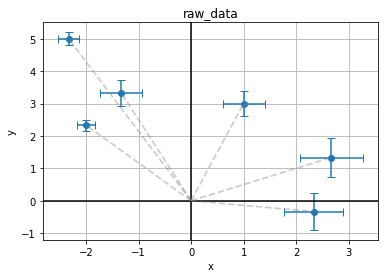

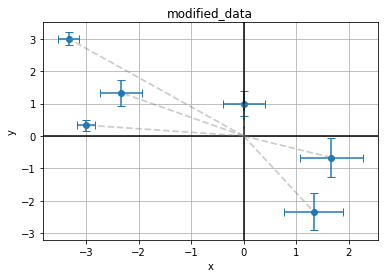

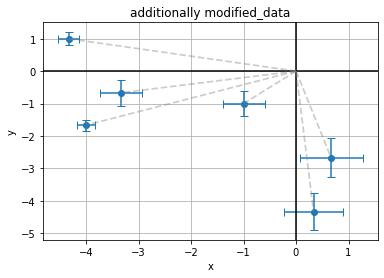

In [9]:
#Suppose we design some finctions function surrounding this data artefact

#One to plot
demo_funcs.demo_plot(data_artifact_a, 
                     title = 'raw_data',
                     verbose_data=False, 
                     mag_line=True)

#One to make a computation on the artifact
#We can show that the original data artefact can be changed if we do not do the copying
mod_artifact = demo_funcs.demo_comp(data_artifact_a, [1, 2])

#One to plot
demo_funcs.demo_plot(mod_artifact, 
                     title = 'modified_data',
                     verbose_data=False, 
                     mag_line=True)

#We can even cascade it further 
mod_artifact_b = demo_funcs.demo_comp(mod_artifact, [1, 2])

#One to plot
demo_funcs.demo_plot(mod_artifact_b, 
                     title = 'additionally modified_data',
                     verbose_data=False, 
                     mag_line=True)

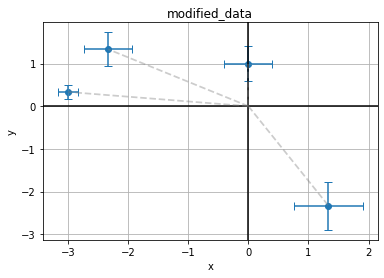

In [10]:
#We can slice which is useful
#One to plot
demo_funcs.demo_plot(mod_artifact[1:-1], 
                     title = 'modified_data',
                     verbose_data=False, 
                     mag_line=True)

In [11]:
mod_artifact_b = mod_artifact_b + data_artifact_a

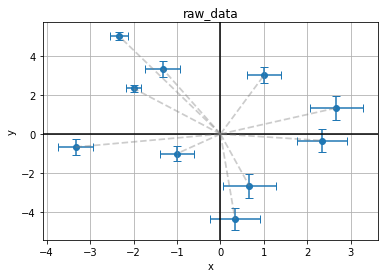

In [15]:
demo_funcs.demo_plot(mod_artifact_b[2:], 
                     title = 'raw_data',
                     verbose_data=False, 
                     mag_line=True)

In [584]:
(mod_artifact_b)

[{'2015-03-05_nameA': [array([-1, -7, -5]),
   [0.8, 0.7, 0.4],
   array([ 1, -2,  4]),
   [0.1, 0.2, 0.3]]},
 {'2011-05-08_nameB': [array([-5, -1, -6]),
   [0.1, 0.7, 0.3],
   array([-3,  0, -2]),
   [0.1, 0.1, 0.3]]},
 {'2019-11-18_nameC': [array([-1, -3,  1]),
   [0.2, 0.5, 0.4],
   array([-5,  0,  2]),
   [0.2, 0.8, 0.2]]},
 {'2014-03-12_nameD': [array([-2,  0,  3]),
   [0.9, 0.6, 0.6],
   array([-6, -4, -3]),
   [0.6, 0.5, 0.6]]},
 {'2009-08-15_nameD': [array([-3, -1, -6]),
   [0.4, 0.1, 0.2],
   array([ 0, -2,  0]),
   [0.4, 0.7, 0.1]]},
 {'2005-12-07_nameE': [array([ 3,  2, -3]),
   [0.8, 0.7, 0.9],
   array([-3, -1, -4]),
   [0.9, 0.6, 0.3]]},
 {'2015-03-05_nameA': [[1, -5, -3],
   [0.8, 0.7, 0.4],
   [5, 2, 8],
   [0.1, 0.2, 0.3]]},
 {'2011-05-08_nameB': [[-3, 1, -4],
   [0.1, 0.7, 0.3],
   [1, 4, 2],
   [0.1, 0.1, 0.3]]},
 {'2019-11-18_nameC': [[1, -1, 3],
   [0.2, 0.5, 0.4],
   [-1, 4, 6],
   [0.2, 0.8, 0.2]]},
 {'2014-03-12_nameD': [[0, 2, 5],
   [0.9, 0.6, 0.6],
   [-2, 0,

In [42]:
#Now suppose a requirement came up that requires the artifact to be modified increasing it to 2D. 
#It could be anything. More data... Meta data. 
#
#
#For some reason you have to accomodate this 2D data structure in your data processing functions
#How ould we write those modifications? How do you modify the functions to 
#take this
#

In [586]:
#Then you have a new data artifact build on top of the first one
data_artifact_2da = ([{'2015-03-05_nameA': [[1,-5,-6],
                                        [.6,.7,.8],
                                        [5,2,-1],
                                        [.4,.6,.7]]},
                   {'2011-05-08_nameB':[[-3,4,-2],
                                        [.8,.7,.5],
                                        [-5,2,-2],
                                        [.1,.1,.3]]},
                   {'2019-11-18_nameC':[[4,-2,1],
                                        [.3,.5,.8],
                                        [-1,7,1],
                                        [.8,.9,.2]]},
                   {'2014-05-21_nameD':[[1,-1,7],
                                        [.6,.5,.8],
                                        [-2,4,-5],
                                        [.8,.9,.7]]}],
                  [datetime.datetime(2015, 3, 5, 18, 21, 40, 865000),
                   datetime.datetime(2011, 5, 8, 18, 5, 3, 165000),
                   datetime.datetime(2019, 11, 18, 10, 3, 2, 245000),
                   datetime.datetime(2014, 5, 21, 15, 1, 4, 185000)])

#This is a two dimensional data. It is a tuple... it is immutable
data_artifact_2da 

([{'2015-03-05_nameA': [[1, -5, -6],
    [0.6, 0.7, 0.8],
    [5, 2, -1],
    [0.4, 0.6, 0.7]]},
  {'2011-05-08_nameB': [[-3, 4, -2],
    [0.8, 0.7, 0.5],
    [-5, 2, -2],
    [0.1, 0.1, 0.3]]},
  {'2019-11-18_nameC': [[4, -2, 1],
    [0.3, 0.5, 0.8],
    [-1, 7, 1],
    [0.8, 0.9, 0.2]]},
  {'2014-05-21_nameD': [[1, -1, 7],
    [0.6, 0.5, 0.8],
    [-2, 4, -5],
    [0.8, 0.9, 0.7]]}],
 [datetime.datetime(2015, 3, 5, 18, 21, 40, 865000),
  datetime.datetime(2011, 5, 8, 18, 5, 3, 165000),
  datetime.datetime(2019, 11, 18, 10, 3, 2, 245000),
  datetime.datetime(2014, 5, 21, 15, 1, 4, 185000)])

In [587]:
len(data_artifact_2da )

2

In [40]:
#Here is a cool trick with string comprehensions

input_data = ["2015-03-05T18:21:40.865000",
              "2011-05-08T18:05:3.165000",
              "2019-04-18T10:03:2.245000",
              "2014-05-21T15:01:4.185000"]

data_artifact_2da = ([{'2015-03-05_nameA': [[1,-6,-10],
                                        [.3,.7,.4],
                                        [5,2,8],
                                        [.1,.2,.3]]},
                   {'2011-05-08_nameB':[[-3,1,-9],
                                        [.1,.7,.3],
                                        [-10,5,-20],
                                        [.1,.1,.3]]},
                   {'2019-11-18_nameC':[[1,-1,9],
                                        [.2,.5,.4],
                                        [-12,6,18],
                                        [.2,.8,.2]]}],
                  [datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S.%f") for x in input_data])

#This is a two dimensional data. It is a tuple... it is immutable
data_artifact_2da

([{'2015-03-05_nameA': [[1, -6, -10],
    [0.3, 0.7, 0.4],
    [5, 2, 8],
    [0.1, 0.2, 0.3]]},
  {'2011-05-08_nameB': [[-3, 1, -9],
    [0.1, 0.7, 0.3],
    [-10, 5, -20],
    [0.1, 0.1, 0.3]]},
  {'2019-11-18_nameC': [[1, -1, 9],
    [0.2, 0.5, 0.4],
    [-12, 6, 18],
    [0.2, 0.8, 0.2]]}],
 [datetime.datetime(2015, 3, 5, 18, 21, 40, 865000),
  datetime.datetime(2011, 5, 8, 18, 5, 3, 165000),
  datetime.datetime(2019, 4, 18, 10, 3, 2, 245000),
  datetime.datetime(2014, 5, 21, 15, 1, 4, 185000)])

In [306]:
#I have presaved them as pickle but likewise they can be excel file.
#We can load like before
filenamea='2ddata_a.pickle'
filenameab='2ddata_ab.pickle'

data_artifact2d_a = demo_funcs.data_loader(filenamea)
data_artifact2d_ab = demo_funcs.data_loader(filenameab)

In [307]:
data_artifact2d_a 

([{'2015-03-05_nameA': [[1, -5, -6],
    [0.6, 0.7, 0.8],
    [5, 2, -1],
    [0.4, 0.6, 0.7]]},
  {'2011-05-08_nameB': [[-3, 4, -2],
    [0.8, 0.7, 0.5],
    [-5, 2, -2],
    [0.1, 0.1, 0.3]]},
  {'2019-11-18_nameC': [[4, -2, 1],
    [0.3, 0.5, 0.8],
    [-1, 7, 1],
    [0.8, 0.9, 0.2]]}],
 [datetime.datetime(2015, 3, 5, 18, 21, 40, 865000),
  datetime.datetime(2011, 5, 8, 18, 5, 3, 165000),
  datetime.datetime(2019, 11, 18, 10, 3, 2, 245000)])

In [308]:
#The length is 2 which is to be expected.

#Tuples are not mutable
print("Length:", len(data_artifact2d_a), type(data_artifact2d_a))
data_artifact2d_ab

Length: 2 <class 'tuple'>


([{'2021-12-02_nameA': [[-4, -6, 4],
    [0.6, 0.7, 0.8],
    [4, -3, -8],
    [0.6, 0.7, 0.8]]},
  {'2022-05-04_nameB': [[-1, 1, -10],
    [0.6, 0.9, 0.6],
    [-10, 5, -2],
    [0.7, 0.5, 0.6]]},
  {'2022-06-07_nameC': [[4, 0.1, 8],
    [0.7, 0.7, 0.8],
    [-2, 5, 2],
    [0.8, 0.9, 0.4]]}],
 [datetime.datetime(2021, 12, 2, 18, 21, 40, 865000),
  datetime.datetime(2022, 5, 4, 18, 5, 3, 165000),
  datetime.datetime(2022, 6, 7, 10, 3, 2, 245000)])

In [309]:
data_artifact2d_a = np.array(data_artifact2d_a)

print(type(data_artifact2d_a), len(data_artifact2d_a))
data_artifact2d_a 

<class 'numpy.ndarray'> 2


array([[{'2015-03-05_nameA': [[1, -5, -6], [0.6, 0.7, 0.8], [5, 2, -1], [0.4, 0.6, 0.7]]},
        {'2011-05-08_nameB': [[-3, 4, -2], [0.8, 0.7, 0.5], [-5, 2, -2], [0.1, 0.1, 0.3]]},
        {'2019-11-18_nameC': [[4, -2, 1], [0.3, 0.5, 0.8], [-1, 7, 1], [0.8, 0.9, 0.2]]}],
       [datetime.datetime(2015, 3, 5, 18, 21, 40, 865000),
        datetime.datetime(2011, 5, 8, 18, 5, 3, 165000),
        datetime.datetime(2019, 11, 18, 10, 3, 2, 245000)]], dtype=object)

In [176]:
#If we put this in our preexisting function... things will break as expected.
#A simple modification can get it to work

demo_funcs.demo_plot(data_artifact2d_a, 
                     title = 'raw_data',
                     verbose_data=False, 
                     mag_line=True)

AttributeError: 'numpy.ndarray' object has no attribute 'keys'

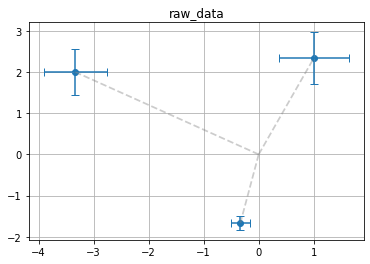

array([[{'2015-03-05_nameA': [array([ 2, -4, -5]), array([0.6, 0.7, 0.8]), array([ 3,  0, -3]), array([0.4, 0.6, 0.7])]},
        {'2011-05-08_nameB': [array([-2,  5, -1]), array([0.8, 0.7, 0.5]), array([-7,  0, -4]), array([0.1, 0.1, 0.3])]},
        {'2019-11-18_nameC': [array([ 5, -1,  2]), array([0.3, 0.5, 0.8]), array([-3,  5, -1]), array([0.8, 0.9, 0.2])]}],
       [datetime.datetime(2015, 3, 5, 18, 21, 40, 865000),
        datetime.datetime(2011, 5, 8, 18, 5, 3, 165000),
        datetime.datetime(2019, 11, 18, 10, 3, 2, 245000)]], dtype=object)

In [310]:
#So we make a simple modification to the for loop to
#This is in a separate function...
demo_funcs.demo_plot2d(data_artifact2d_a, 
                     title = 'raw_data',
                     verbose_data=False, 
                     mag_line=True)

#Can we do operations?
mod_artifact2d = demo_funcs.demo_comp2d(data_artifact2d_a, [-1, 2])
mod_artifact2d

#So lets verify these features:
#Add/ append data
#Subtract/ Remove data
#Slice data

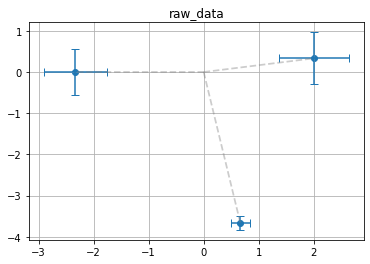

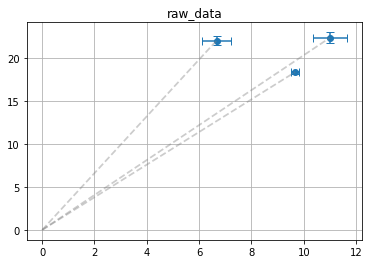

In [312]:
demo_funcs.demo_plot2d(mod_artifact2d, 
                     title = 'mod_artifact_2d',
                     verbose_data=False, 
                     mag_line=True)

mod_artifact2db = demo_funcs.demo_comp2d(data_artifact2d_a, [-10, -20])

demo_funcs.demo_plot2d(mod_artifact2db, 
                     title = 'mod_artifact_2db',
                     verbose_data=False, 
                     mag_line=True)

In [588]:
appended = demo_funcs.append_struct(mod_artifact2d, mod_artifact2db)
print(type(appended), "Length:" ,len(appended))

<class 'list'> Length: 2


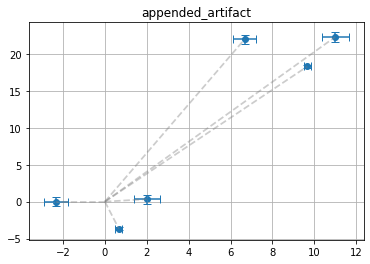

In [317]:
demo_funcs.demo_plot2d(appended, 
                     title = 'appended_artifact',
                     verbose_data=False, 
                     mag_line=True)

combined = demo_funcs.append_struct(appended, data_artifact2d_ab)

In [590]:
len(combined[0])

9

In [322]:
#Subtract/ Remove data
deleted_a = demo_funcs.delete_struct(combined, 1)
deleted_b = demo_funcs.delete_struct(deleted_a, 0)
deleted_c = demo_funcs.delete_struct(deleted_b, 3)
deleted_d = demo_funcs.delete_struct(deleted_c, 4)

#What do you think the length of c will be?

#print(deleted_d , len(deleted_d), len(deleted_d[0])    )

In [591]:
#suppose I only wanted to delete all the odd numbered items in our data
for k in range(0,len(deleted_d[0])):
    if(k%2 != 0): #What goes in here?
        demo_funcs.delete_struct(combined, k)

In [593]:
#combined

In [346]:
#Slice?

np.array(combined)[:3,:5]

array([[{'2015-03-05_nameA': [array([ 2, -4, -5]), array([0.6, 0.7, 0.8]), array([ 3,  0, -3]), array([0.4, 0.6, 0.7])]},
        {'2011-05-08_nameB': [array([-2,  5, -1]), array([0.8, 0.7, 0.5]), array([-7,  0, -4]), array([0.1, 0.1, 0.3])]},
        {'2019-11-18_nameC': [array([ 5, -1,  2]), array([0.3, 0.5, 0.8]), array([-3,  5, -1]), array([0.8, 0.9, 0.2])]},
        {'2015-03-05_nameA': [array([11,  5,  4]), array([0.6, 0.7, 0.8]), array([25, 22, 19]), array([0.4, 0.6, 0.7])]},
        {'2011-05-08_nameB': [array([ 7, 14,  8]), array([0.8, 0.7, 0.5]), array([15, 22, 18]), array([0.1, 0.1, 0.3])]},
        {'2019-11-18_nameC': [array([14,  8, 11]), array([0.3, 0.5, 0.8]), array([19, 27, 21]), array([0.8, 0.9, 0.2])]},
        {'2021-12-02_nameA': [[-4, -6, 4], [0.6, 0.7, 0.8], [4, -3, -8], [0.6, 0.7, 0.8]]},
        {'2022-05-04_nameB': [[-1, 1, -10], [0.6, 0.9, 0.6], [-10, 5, -2], [0.7, 0.5, 0.6]]},
        {'2022-06-07_nameC': [[4, 0.1, 8], [0.7, 0.7, 0.8], [-2, 5, 2], [0.8, 0.9,

In [330]:
type(deleted_d[1])

numpy.ndarray

In [595]:
#The toy problem.

#Is it this one?
np.array([[2, 4],
         [1, 6],
         [8, 2],
         [1, -2],
         [8, 2],
         [1, -2]])[:,:2]

array([[ 2,  4],
       [ 1,  6],
       [ 8,  2],
       [ 1, -2],
       [ 8,  2],
       [ 1, -2]])

In [596]:
#Or is it this one
np.array([[2, 4, 5, 7, 8, 10, 11, 25],
          [1, 6, 8, 2, 1, -2, 8, 2]])[:,3:5]

array([[7, 8],
       [2, 1]])

In [ ]:
#The concept of the toy problem. Using toy problems to solve whatever problems you face

#Also touching on design concepts 

In [599]:
np.array(combined)[:3,:4]

array([[{'2015-03-05_nameA': [array([ 2, -4, -5]), array([0.6, 0.7, 0.8]), array([ 3,  0, -3]), array([0.4, 0.6, 0.7])]},
        {'2011-05-08_nameB': [array([-2,  5, -1]), array([0.8, 0.7, 0.5]), array([-7,  0, -4]), array([0.1, 0.1, 0.3])]},
        {'2019-11-18_nameC': [array([ 5, -1,  2]), array([0.3, 0.5, 0.8]), array([-3,  5, -1]), array([0.8, 0.9, 0.2])]},
        {'2015-03-05_nameA': [array([11,  5,  4]), array([0.6, 0.7, 0.8]), array([25, 22, 19]), array([0.4, 0.6, 0.7])]}],
       [datetime.datetime(2015, 3, 5, 18, 21, 40, 865000),
        datetime.datetime(2011, 5, 8, 18, 5, 3, 165000),
        datetime.datetime(2019, 11, 18, 10, 3, 2, 245000),
        datetime.datetime(2015, 3, 5, 18, 21, 40, 865000)]], dtype=object)

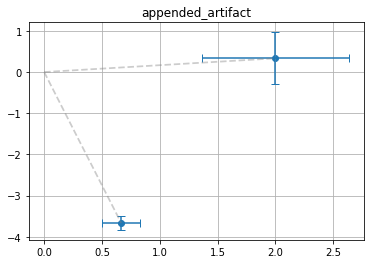

In [603]:
demo_funcs.demo_plot2d(np.array(combined)[:,1:3], 
                     title = 'appended_artifact',
                     verbose_data=False, 
                     mag_line=True)

In [377]:
np.array(combined)[:,0:6][1]

array([datetime.datetime(2015, 3, 5, 18, 21, 40, 865000),
       datetime.datetime(2011, 5, 8, 18, 5, 3, 165000),
       datetime.datetime(2019, 11, 18, 10, 3, 2, 245000),
       datetime.datetime(2015, 3, 5, 18, 21, 40, 865000),
       datetime.datetime(2011, 5, 8, 18, 5, 3, 165000),
       datetime.datetime(2019, 11, 18, 10, 3, 2, 245000)], dtype=object)

In [382]:
[int(x.strftime('%Y%m%d')) for x in np.array(combined)[:,0:6][1]]  # int(np.array(combined)[:,0:6][1][0].strftime('%Y%m%d'))

[20150305, 20110508, 20191118, 20150305, 20110508, 20191118]

Plot magnitude as a function of time


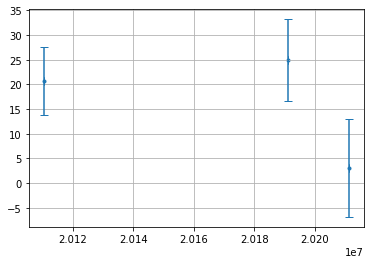

In [606]:
#Challenge. we could do together. Write a part of this pipe that takes in the data structure.
#For each data calculate the magnitude using the numpy function where magnitude of mean [0] and mean [1]

#Visualize the data as a function of the date time objects (x axis)
demo_funcs.function_of_time(np.array(combined)[:,4:7])

In [360]:
np.linalg.norm([3, 5])

5.830951894845301

In [361]:
np.sqrt((3**2)+(5**2)  )

5.830951894845301

In [432]:
import scipy.stats as stats
import math
import pandas as pd
import matplotlib.pyplot as plt

data_bag  =['mango', 'orange','apple','orange',
 'strawberry','strawberry','cucumber',
 'lemon','orange','guava', 'mango',
 'strawberry','blackberry','strawberry',
 'lemon','orange','guava','strawberry','apple','guava',
 'orange','cucumber','cucumber','lemon','cucumber','lemon']

df = pd.DataFrame(data_bag)
print(len(data_bag))

26


In [424]:
# Specify sample occurrences (x), sample size (n) and confidence level
x = data_bag.count('strawberry')
n = len(data_bag )
cl = 0.95 #This is set by best practice

#Calculate 
pes = x/n #point estimate
a = (1-cl) #alpha - level of significance
critical_z = stats.norm.ppf(1-a/2) #critical z-value
standard_error = math.sqrt((pes*(1-pes)/n)) #standard error, 
margin_of_error = critical_z * standard_error #margin of error

# Calculate the lower and upper bound of the confidence interval
lower_bound = pes - margin_of_error
upper_bound = pes + margin_of_error

# Print the results
print("The confidence interval of observing observing strawberry from the population is", lower_bound,"and",upper_bound,
     "given a condfidence level of:", cl)

The confidence interval of observing observing strawberry from the distribution is 0.040818127280702304 and 0.34379725733468236 given a condfidence level of: 0.95


In [439]:
demo_funcs.confidence_level_categorical(data_bag, 'strawberry', 0.96, verbose=True)

The confidence interval of observing observing strawberry from the distribution is 0.03356930139828976 and 0.35104608321709485 given a condfidence level of: 0.96


0.3174767818188051

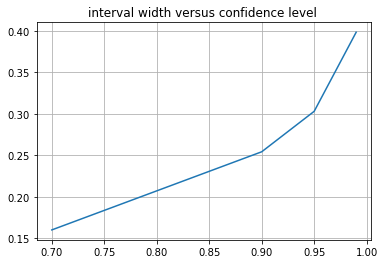

In [440]:
plt.plot([0.7, 0.9, 0.95, 0.99], 
         [ demo_funcs.confidence_level_categorical(data_bag, 'strawberry', 0.7),
           demo_funcs.confidence_level_categorical(data_bag, 'strawberry', 0.9),
           demo_funcs.confidence_level_categorical(data_bag, 'strawberry', 0.95),
           demo_funcs.confidence_level_categorical(data_bag, 'strawberry',  0.99)])
plt.title("Confidence interval width versus confidence level ")
plt.grid()

#The greater your confidence level. The wider your confidence interval. The greater your confidence
#level the larger the net you have to catch the mean correct mean value

In [499]:
demo_funcs.confidence_level_numerical(dataset_a, 0.95, verbose=True)

In [608]:
group_a = [70, 80, 65, 32, 89, 72, 32, 54, 34, 56, 68, 62, 80, 75, 63, 45,
             54, 58, 50, 61, 72, 73, 41, 82, 90, 42, 54, 62, 85, 81, 70, 70,
             45, 18, 80, 21, 11, 83, 77, 62, 26, 54, 64, 81, 71, 32, 63, 61,
             51, 86, 18, 18, 12, 92, 94, 17, 67, 18, 71, 32, 75, 52, 20, 83,
             51, 41, 27, 88, 64, 36, 82, 29, 62, 48, 21, 96, 81, 49, 31, 99]

group_b = [91, 68, 69, 40, 80, 29, 50, 74, 69, 52, 57, 45, 50, 88, 59, 82, 
             90, 85, 40, 60, 72, 37, 87, 58, 63, 56, 85, 84, 71, 64, 80, 61,
             82, 58, 96, 61, 62, 73, 66, 82, 60, 40, 92, 82, 55, 91, 79, 79,
             85, 38, 19, 40, 84, 83, 51, 62, 79, 42, 64, 80, 35, 67, 88, 99,
             67, 86, 78, 68, 79, 92, 94, 87, 64, 51, 81, 78, 75, 52, 60, 83]

In [607]:
#zscore = 3
#print(stats.norm.cdf(3))

In [514]:
#p value-> The probability of observing the data or data more extreme given that the null is true
#A small p-value (typically less than 0.05) indicates that the observed data is unlikely to
#have occurred by chance, and suggests that the null hypothesis should be rejected in favor 
#of the alternative hypothesis.

#Alpha -> The significance level, is the threshold of probability (p-value) 
#at which you reject the null hypothesis in a hypothesis test. It is typically set at 0.05,

#cl = 0.95
#a = 1-0.95 = 0.05

#0.05/2, 0.05/2

#IF THE PVALUE IS LESS THAN ALPHA WE REJECT THE NULL HYPOTHESIS

In [515]:
#For simplest hypothesis test we can do ztest
from statsmodels.stats.weightstats import ztest
from scipy.stats import chisquare

print("The number of students in group A is:", len(group_a))
print("The number of students in group B is:", len(group_b))
n = len(dataset_a)

The number of students in group A is: 80
The number of students in group B is: 80


In [610]:
#Lets say in the year 2019 someone did a study and found that the mean score is 60
#Then comes a researcher and measures dataset_a test results

#We can state our Null hypothesis in this case that the mean score is 60
#Null hypothesis are hypothesis of no change. No difference. (status quo)
#Alternate hypothesis the mean score is not 60, challenge the status quo

#H_o = The mean score = 60
#H_1 = The mean score != 60

#We can test for significance of a single sample.
ztest_reultst = ztest(group_a, value=68.3125)
print("Zscore:", ztest_reultst[0], "pValue", ztest_reultst[1])

Zscore: -4.199403817734997 pValue 2.676186771579294e-05


In [1]:
np.linspace(0,20)

NameError: name 'np' is not defined

In [611]:
#There is another class that takes the same test and gets different 
ztest_reultst = ztest(group_b, value=60)
print("Zscore:", ztest_reultst[0], "pValue", ztest_reultst[1])

Zscore: 4.17152619442383 pValue 3.0256626688326636e-05


In [613]:
#This is interesting. Based on the results of the ztest 
ztest_reults = ztest(class_a, class_b,value=0)
print("Zscore:", ztest_reultst[0], "pValue", ztest_reultst[1])

Zscore: 4.17152619442383 pValue 3.0256626688326636e-05


In [ ]:
#We can use t test if the variance is unknown and the sample size is small

In [614]:
(corr)

tuple

In [616]:
#Correlation test. Pearsons correlation coeeficient
#1 is positive strong correlation
#-1 is negative anti correlation

#H_0 there is no correlation between the two variables
#H_1 there is a correlation between two variables

practice = [15, 18, 12, 19, 18, 12, 12, 8, 8, 20, 35]
actual = [72, 68, 60, 54, 85, 51, 40, 32, 30, 73, 72 ]

corr = stats.pearsonr(practice, actual)
print ("Correlation Coefficient:", corr[0], "Pvalue:", corr[1]) 

Correlation Coefficient: 0.6544125917346852 Pvalue: 0.02890829080248868


In [530]:
#H_0 there is no correlation between the two variables
#H_1 there is a correlation between two variables

practice = [-14, 0, 12, 19, 1, 12, 12, -2, 2, 30]
actual = [72, 72, 60, 54, 85, 51, 40, 32, 30, 73 ]

corr = stats.pearsonr(practice, actual)
print ("Correlation Coefficient:", corr[0], "Pvalue:", corr[1]) 

Correlation Coefficient: 0.0020030347299763718 Pvalue: 0.9956183791079166


In [543]:
#H_0: There is no relationship/ goodness of fit between the two variables
#H_1: hypothesis: There is no relationship/ goodness of fit between the two variables

#Chi squared goodness of fit
expected = [51, 71, 65, 62, 55, 62, 81, 75, 63]
observed = [50, 66, 40, 47, 53, 66, 72, 62, 52]

chi_square_stats = stats.chisquare(f_obs=observed, f_exp=expected)
print("Statistic:", chi_square_stats[0], "pvalue:", chi_square_stats[1])

Statistic: 19.12089743546728 pvalue: 0.014226288235863074


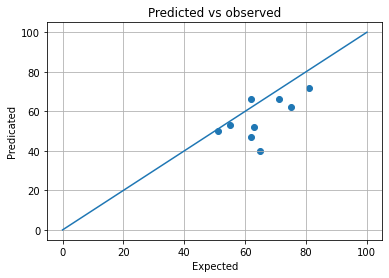

In [555]:
plt.scatter(expected,observed)
plt.plot([0,100], [0,100]   )
plt.title("Predicted vs observed")
plt.xlabel("Expected")
plt.ylabel("Predicated")
plt.grid()
plt.show()

In [ ]:
#developers impact N copies sold.

#H_o: There is no distinction between developer and N copies sold
#H_1: There is a distinction between developer and N copies sold

#Correlation?
#Ztesting...

#dataA = [48410000.0, 40170000.0, ] #All N copies sold of games of Nintendo EPD]
#dataB = [40170000.0, All N copies sold of games of Nintendo Bandai Namco]

#ztest_reults = ztest(class_a, class_b,value=0)
#print("Zscore:", ztest_reultst[0], "pValue", ztest_reultst[1])

In [575]:
df = pd.read_csv('./data/best_selling_switch_games.csv')

dfori = df.copy()
dfori

,title,copies_sold,genre,developer,publisher,as_of,release_date
0,Mario Kart 8 Deluxe,48410000.0,Kart racing,Nintendo EPD,Nintendo,2022-09-30,2017-04-28
1,Animal Crossing: New Horizons,40170000.0,Social simulation,Nintendo EPD,Nintendo,2022-09-30,2020-03-20
2,Super Smash Bros. Ultimate,29530000.0,Fighting,Bandai Namco StudiosSora Ltd.,Nintendo,2022-09-30,2018-12-07
3,The Legend of Zelda: Breath of the Wild,27790000.0,Action-adventure,Nintendo EPD,Nintendo,2022-09-30,2017-03-03
4,Pokémon Sword and Shield,25370000.0,Role-playing,Game Freak,The Pokémon CompanyNintendo,2022-09-30,2019-11-15
...,...,...,...,...,...,...,...
68,Fitness Boxing,1000000.0,Exergamerhythm,Imagineer,JP: ImagineerNA/PAL: Nintendo,2020-09-08,2018-12-20
69,Fitness Boxing 2: Rhythm and Exercise,1000000.0,Exergamerhythm,Imagineer,JP: ImagineerNA/PAL: Nintendo,2021-12-09,2020-12-04
70,Shin Megami Tensei V,1000000.0,Role-playing,Atlus,JP: AtlusNA: SegaPAL: Nintendo,2022-04-18,2021-11-11
71,Story of Seasons: Pioneers of Olive Town,1000000.0,Simulationrole-playing,Marvelous,Xseed Games,2021-11-18,2021-02-25


In [576]:
#Correlation test
#Release date and copies sold. There may be a positive correlation between time approaching christmas
#and number of copies sold

#H_0: There is no correlation between release date and number of copies sold
#H_1: There is a correlation between release date and copies sold and 

#How would we test that?
    #Convert release date into 12 bins. One for each month
    
    #Summ N copies sold into 12 bins as well. Summing up all the values that fall within that 
    #respective month
    
    #Use pearson correlation test: corr = stats.pearsonr(practice, actual)
    
    #Interpret result

In [ ]:
#There is role playing and action role playing. The two genres are effectively the same based on
#Sales number
    #H_0: There is no difference between the N copies sold of roleplaying and N copies sold
    #of action roleplaying
    #H_1: There is a difference between the N copies sold.

    #Create two lists, one with sales figures of roleplaying and another with N copies of action
    #roleplaying
    
    #ztest_reults = ztest(RPG, ARPG)
    
    #Interpret result
    #Likewise you can compare other genres the same manner 

In [581]:
for k in range(0, len(dfori['genre'])):
    print(dfori['genre'][k])

Kart racing
Social simulation
Fighting
Action-adventure
Role-playing
Platformer
Party
Role-playing
Exergamerole-playing
Role-playing
Action role-playing
Platformer
Third-person shooter
Action-adventure
Role-playing
Platformer
Platformercompilation
Party
Third-person shooter
PlatformerLevel editor
Action role-playing
Sports
Action-adventure
Platformer
Sports
Tabletop game
Platformer
Hack and slash
Platformer
Action-adventure
Tactical role-playing
Party
Board game
Role-playingaction-adventure
Sandboxsurvival
Partysocial deduction
Platformer
Action-adventure
Photography
Fighting
Action role-playing
Sports
Real-time strategypuzzle
Sports
Role-playing
Action puzzle
Fighting
Tactical role-playing
Roguelike
Rhythm
Action role-playing
Role-playing
Action role-playing
Puzzle
Kart racingaugmented reality
Fighting
Fighting
Action role-playing
Construction kit
Action-adventure, Hack and Slash
Party
Fighting
Puzzle
Survival horror
Programming
Action-adventure, Hack and Slash
Bullet hell
Hack and sl

In [580]:
for k in range(0, len(dfori['title'])):
    print(dfori['title'][k])

Mario Kart 8 Deluxe
Animal Crossing: New Horizons
Super Smash Bros. Ultimate
The Legend of Zelda: Breath of the Wild
Pokémon Sword and Shield
Super Mario Odyssey
Super Mario Party
Pokémon Brilliant Diamond and Shining Pearl
Ring Fit Adventure
Pokémon: Let's Go, Pikachu! and Let's Go, Eevee!
Pokémon Legends: Arceus
New Super Mario Bros. U Deluxe
Splatoon 2
Luigi's Mansion 3
Pokémon Scarlet and Violet
Super Mario 3D World + Bowser's Fury
Super Mario 3D All-Stars
Mario Party Superstars
Splatoon 3
Super Mario Maker 2
Monster Hunter Rise
Nintendo Switch Sports
The Legend of Zelda: Link's Awakening
Kirby and the Forgotten Land
Mario Tennis Aces
Clubhouse Games: 51 Worldwide Classics
Donkey Kong Country: Tropical Freeze
Hyrule Warriors: Age of Calamity
Kirby Star Allies
The Legend of Zelda: Skyward Sword HD
Fire Emblem: Three Houses
1-2-Switch
Momotaro Dentetsu: Showa, Heisei, Reiwa Mo Teiban!
Paper Mario: The Origami King
Minecraft
Among Us
Yoshi's Crafted World
Metroid Dread
New Pokémon Sna

<bound method Series.unique of 0                Kart racing
1          Social simulation
2                   Fighting
3           Action-adventure
4               Role-playing
               ...          
68            Exergamerhythm
69            Exergamerhythm
70              Role-playing
71    Simulationrole-playing
72                   Stealth
Name: genre, Length: 73, dtype: object>

In [565]:
df['genre'].unique()
#clean_funcs.clean_df(df)

array(['Kart racing', 'Social simulation', 'Fighting', 'Action-adventure',
       'Role-playing', 'Platformer', 'Party', 'Exergamerole-playing',
       'Action role-playing', 'Third-person shooter',
       'Platformercompilation', 'PlatformerLevel editor', 'Sports',
       'Tabletop game', 'Hack and slash', 'Tactical role-playing',
       'Board game', 'Role-playingaction-adventure', 'Sandboxsurvival',
       'Partysocial deduction', 'Photography', 'Real-time strategypuzzle',
       'Action puzzle', 'Roguelike', 'Rhythm', 'Puzzle',
       'Kart racingaugmented reality', 'Construction kit',
       'Action-adventure, Hack and Slash', 'Survival horror',
       'Programming', 'Bullet hell', 'Hack and slashRole-playing',
       'Exergamerhythm', 'Simulationrole-playing', 'Stealth'],
      dtype=object)

In [ ]:
#Zscore method. Zscores are just distances from the mean.
#This just replaces the table

In [204]:
#Find the critical value

1.959963984540054

In [ ]:
#Left tailed
scipy.stats.norm.ppf(.01)

In [ ]:
#Right tailed
scipy.stats.norm.ppf(1-.01)

In [205]:
#Two tailed test
scipy.stats.norm.ppf(1-.01/2)

scipy.stats.norm.ppf(1-.05/2) #two tailed ttest

1.959963984540054

In [502]:
scipy.stats.norm.ppf(1-.01/2)

2.5758293035489004

In [556]:
1-.05/2

0.975